# 3.1 writing_good_code

# 1 overview

1. When computer programs are small, poorly written code is not overly costly.
2. But more data, more sophisticated models, and more computer power are enabling us to take on more challenging problems that involve writing longer programs.
   - For such programs, investment in good coding practices will pay high returns.
     - The main payoffs are higher productivity and faster code.
   - In this lecture, 
     - we review some elements of good coding practice,
     - we also touch on modern developments in scientific computing and how they affect good program design.
       - Such as just-in-time compilation.

# 2 an example of poor code

1. Let's have a look at some poorly written code.
   - The job of the code is to generate and plot time series of the simplified Solow model
   $$
   k_{t+1} = sk ^{\alpha}_t + (1 -\delta) k_t, t = 0, 1, 2,\dots \tag{(1)}
   $$
     - Here
       - $k_t$ is capital at time $t$ and
       - $s, \alpha, \delta$ are parameters (savings, a productivity parameter and depreciation)
   - For each parametrization, the code
     - sets $k_0=1$,
     - iterates using [(1)](#equation_1) to produce a sequence $k_0, k_1, \dots, k_T$
     - plots the sequence.
   - The plots will be grouped into three subfigures.
     - In each subfigure, two parameters are held fixed while another varies.
2. The code more or less follows PEP8, but it's very poorly structured at the same time.
   - Let's talk about why that's the case, and what we can do about it.

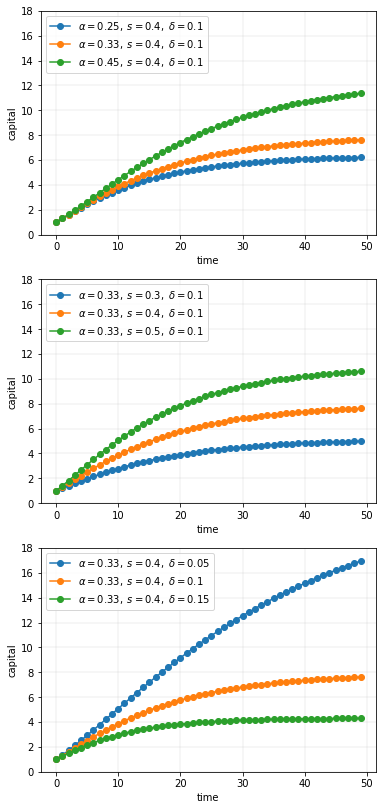

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Allocate memory for time series

k = np.empty(50)

fig, axes = plt.subplots(3, 1, figsize=(6, 14))

# Trajectories with different α

δ = 0.1
s = 0.4
α = (0.25, 0.33, 0.45)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]** α[j] + ( 1 - δ) * k[t]
    axes[0].plot(k, 'o-', label=rf"$\alpha = {α[j]},\; s = {s},\; \delta={δ}$")
    

axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc='upper left', frameon=True)

# Trajectories with different s

δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s[j] * k[t]** α + ( 1 - δ) * k[t]
    axes[1].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s[j]},\; \delta={δ}$")
    

axes[1].grid(lw=0.2)
axes[1].set_ylim(0, 18)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].legend(loc='upper left', frameon=True)

# Trajectories with different δ

δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]** α + ( 1 - δ[j]) * k[t]
    axes[2].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ[j]}$")
    

axes[2].grid(lw=0.2)
axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].legend(loc='upper left', frameon=True)

plt.show()

# 3 good coding practice

1. There are usually many different ways to write a program that accomplishes a given task.
   - For small programs, like the one above, the way we write code doesn't matter too much.
   - But if we are ambitious and want to produce useful things, we will write medium to large programs, too.
     - In those settings, coding style matters a great deal.
     - Here are some basic precepts.

## 3.1 don't use magic numbers

1. If we look at the code above, we will see numbers like $50$ and $49$ and $3$ scattered through the code.
   - These kinds of numeric literals in the body of our code are sometimes called "**magic numbers**".
     - This is not a compliment.
   - While numeric literals are not all evil. the numbers shown in the program above should certainly be replaced by named constants.
     - e.g., the code above could declare the variable time_series_length=50 (**PI1: add `time_series_length=50`**).
     - Then in the loops, $49$ should be replaced by time_series_length-1 (**PI2: add `time_series_length=50`**).
   - The advantages are:
     - the meaning is much clearer throughout
     - to alter the time series length, we only need to change one value.

## 3.2 don't repeat ourselves

1. The other mortal sin in the code snippet above is repetition.
   - Blocks of logic (such as the loop to generate time series) are repeated with only minor changes.
   - This violates a fundamental tenet of programming: Don't repeat ourselves (DRY).
     - Also called DIE (duplication is evil).
   - Yes, we realize that we can just cut and paste and change a few symbols.
     - But as a programmer, our aim should be to automate repetition, not do it ourselves.
     - More importantly, repeating the same logic in different places means that eventually one of them will likely be wrong.
2. If we want to know more, read the excellent summary found on this documentation.
   - We will talk about how to avoid repetition below.

## 3.3 minimize global variables

1. Sure global variables (i.e., names assigned to values outside of any function or class) are convenient.
   - Rookie programmers typically use global variables with abandon.
   - But global variables are dangerous, especially in medium to large size programs, since
     - they can affect what happens in any part of our program
     - they can be changed by any function.
   - This makes it much harder to be certain about what some small part of a given piece of code actually commands.
     - Here's useful discussion on the topic.
     - While the odd global in small scripts is no big deal, we recommend that we teach ourselves to avoid them.
       - We will discuss how just below.

### JIT compilation

1. For scientific computing, there is another good reason to avoid global variables.
   - As we've seen in previous lectures, JIT compilation can generate excellent performance for scripting languages like Python.
   - But the task of the compiler used for JIT compilation becomes harder when global variables are present.
   - Put differently, the type inference required for JIT compilation is safer and more effective when variables are sandboxed inside a function.

## 3.4 use functions or classes

1. Fortunately, we can easily avoid the evils of global variables and WET code (**PI: WET?**).
   - WET stands for "we enjoy typing" and is the opposite of DRY.
2. We can do this by making frequent use of functions or classes.
   - In fact, **functions and classes** are designed specifically to help us avoid shaming ourselves by repeating code or excessive use of global variables.

### which one, functions or classes

1. Both can be useful, and in fact(**PI:,**) they work well with each other.
   - We will learn more about these topics over time.
   - What's really important is that we use one or the other or both.


# 4 revisiting the example

1. Here's some code that reproduces the plot above with better coding style.
2. If we inspect this code, then we will see that
   - it uses a function to avoid repetition,
   - global variables are quarantined by collecting them together at the end, not the start of the program.
   - magic numbers are avoided.
   - the loop at the end where the actual work is done is short and relatively simple.

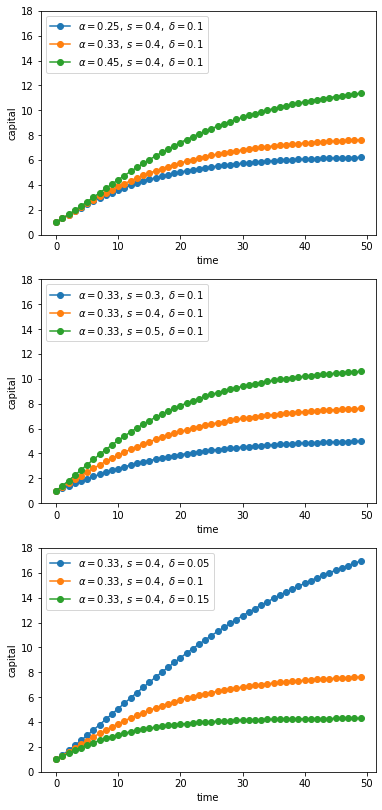

In [2]:
from itertools import product

def plot_path(ax, αs, s_vals, δs, series_length=50):
    k = np.empty(series_length)
    
    for (α, s, δ) in product(αs, s_vals, δs):
        k[0] = 1
        for t in range(series_length-1):
            k[t+1] = s * k[t] ** α + ( 1 - δ) * k[t]
        ax.plot(k, 'o-', label=rf"$\alpha = {α}, \; s = {s},\; \delta = {δ} $")
    
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True)
    
fig, axes = plt.subplots(3, 1, figsize=(6, 14))

# Parameteris (αs, s_vals, δs)

set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    αs, s_vals, δs = params
    plot_path(ax, αs, s_vals, δs)
    
plt.show()

# 5 exercises
### Exercise 1

Here is some code that needs improving.

It involves a basic supply and demand problem.

Supply is given by

$$
q_s(p) = \exp(\alpha p) - \beta.
$$

The demand curve is

$$
q_d(p) = \gamma p^{-\delta}.
$$

The values $ \alpha $, $ \beta $, $ \gamma $ and
$ \delta $ are **parameters**

The equilibrium $ p^* $ is the price such that
$ q_d(p) = q_s(p) $.

We can solve for this equilibrium using a root(**PI:-**)finding algorithm.
Specifically, we will find the $ p $ such that $ h(p) = 0 $,
where

$$
h(p) := q_d(p) - q_s(p)
$$

This yields the equilibrium price $ p^* $. From this(**PI:,**) we get the
equilibrium price by $ q^* = q_s(p^*) $

The parameter values will be

- $ \alpha = 0.1 $  
- $ \beta = 1 $  
- $ \gamma = 1 $  
- $ \delta = 1 $  

In [76]:
from scipy.optimize import brentq

class QP:
    
    def __init__(self, α=0.1, β=1, γ=1, δ=1):
        self.α, self.β = α, β
        self.γ, self.δ = γ, δ
    
    def qs(self, p):
        return (np.exp(self.α * p) - self.β)
    
    def qd(self, p):
        return self.γ * p**(-self.δ)
    
    def h(self, p):
        return self.γ * p**(-self.δ) - (np.exp(self.α * p) - self.β)
    
    def equilibrium(self, a, b):
        p_star = brentq(self.h, a, b)
        q_star = self.qs(p_star)
        print(f'Equilibrium price is {p_star: .2f}')
        print(f'Equilibrium quantity is {q_star: .2f}')
        
    def plot(self, a, b):
        grid = np.linspace(a, b, 100)
        qs = self.qs(grid)
        qd = self.qd(grid)
        
        fig, ax = plt.subplots()
        ax.plot(grid, qd, 'b-', lw=2, label='demand')
        ax.plot(grid, qs, 'g-', lw=2, label='supply')
        
        ax.set_xlabel('price')
        ax.set_ylabel('quantity')
        ax.legend(loc='upper center')
        plt.show()

In [77]:
qp = QP()

In [79]:
qp.equilibrium(2, 4)

Equilibrium price is  2.93
Equilibrium quantity is  0.34


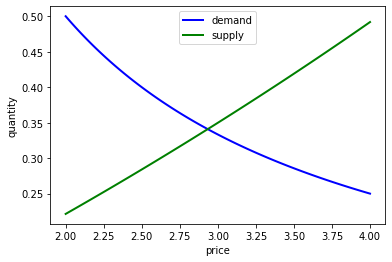

In [78]:
qp.plot(2, 4)

In [72]:
from scipy.optimize import brentq

# Compute equilibrium
def h(p):
    return p**(-1) - (np.exp(0.1 * p) - 1)  # demand - supply

p_star = brentq(h, 2, 4)
q_star = np.exp(0.1 * p_star) - 1

print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  2.93
Equilibrium quantity is  0.34


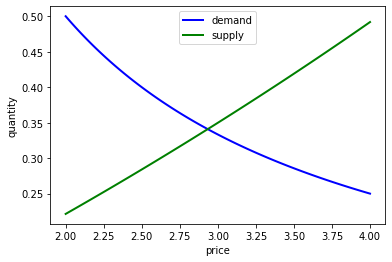

In [80]:
# Let’s also plot our results.

grid = np.linspace(2, 4, 100)
fig, ax = plt.subplots()

qs = np.exp(0.1 * grid) - 1
qd = grid**(-1)


ax.plot(grid, qd, 'b-', lw=2, label='demand')
ax.plot(grid, qs, 'g-', lw=2, label='supply')

ax.set_xlabel('price')
ax.set_ylabel('quantity')
ax.legend(loc='upper center')

plt.show()

We also want to consider supply and demand shifts.

For example, let’s see what happens when demand shifts up, with $ \gamma $ increasing to $ 1.25 $:

In [74]:
# Compute equilibrium
def h(p):
    return 1.25 * p**(-1) - (np.exp(0.1 * p) - 1)

p_star = brentq(h, 2, 4)
q_star = np.exp(0.1 * p_star) - 1

print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  3.25
Equilibrium quantity is  0.38


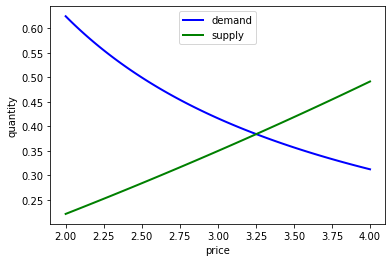

In [75]:
# Now plot
p_grid = np.linspace(2, 4, 100)
fig, ax = plt.subplots()

qs = np.exp(0.1 * p_grid) - 1
qd = 1.25 * p_grid**(-1)


ax.plot(grid, qd, 'b-', lw=2, label='demand')
ax.plot(grid, qs, 'g-', lw=2, label='supply')

ax.set_xlabel('price')
ax.set_ylabel('quantity')
ax.legend(loc='upper center')

plt.show()

Now we might consider supply shifts, but you already get the idea that there’s
a lot of repeated code here.

Refactor and improve clarity in the code above using the principles discussed
in this lecture.

In [83]:
qp1 = QP(γ=1.25)
qp1.equilibrium(2, 4)

Equilibrium price is  3.25
Equilibrium quantity is  0.38


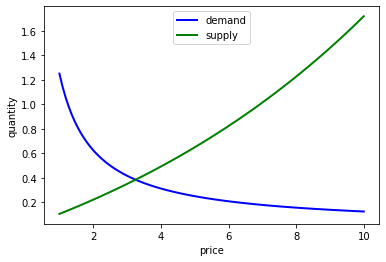

In [86]:
qp1.plot(1, 10)

In [ ]:
# PI3: the parameter is not changed in the solution part.

qp2.α = 0.12

In [87]:
qp.α = 0.12

qp.equilibrium(2, 4)

Equilibrium price is  2.66
Equilibrium quantity is  0.38


In [ ]:
qp.